<a href="https://colab.research.google.com/github/LakshmanGoel/YbIII/blob/main/zeeman_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
# Zeeman slower design calculator & plotter for 171Yb (399 nm line)
import numpy as np
import matplotlib.pyplot as plt

In [172]:
# constants
hbar = 1.054571817e-34    # J·s
mu_B = 9.2740100783e-24   # J/T
mu0  = 4*np.pi*1e-7   # H/m
amu  = 1.66053906660e-27   # kg

In [173]:
# Yb-171, 399 nm line data
lam = 399e-9    # m
k = 2*np.pi/lam   # 1/m
gamma = 2 * np.pi * 29e6    # Hz
m = 171 * amu   # kg

In [174]:
# Zeeman slower parameters
u0 = 300.0    # m/s, oven atom speed
v_end = 10.0    # m/s, exit speed (MOT-capture-compatible)
s = 5.0     # saturation parameter I/Isat; η = s/(1+s)
detuning_MHz = -200    # laser detuning Δ0 in MHz (angular: 2π*MHz below)
g_eff = 1.0   # μ_eff ≈ g_eff * μ_B (≈1 for 1P1 cycling branch)

In [175]:
# calculated parameters
eta = s/(1 + s)
a_max = hbar * k * gamma / (2*m)      # m/s^2, assumes s >> 1
a = eta * a_max
Delta0 = 2*np.pi * detuning_MHz * 1e6   # true detuning
mu_eff = g_eff * mu_B

In [176]:
# parameter sanity checks
if v_end >= u0:
    raise ValueError("v_cap must be < u0 (you can't 'slow' to a higher speed).")
if eta <= 0 or eta > 1:
    raise ValueError("Invalid saturation parameter s. Expect s>=0 giving 0<η<1.")


In [177]:
# experiemtnal calculations
L = (u0**2 - v_end**2) / (2*eta*a_max)    # slower length if V(z) = 0
N = 100
z = np.linspace(0.0, L, N)    # position grid
v = np.sqrt(np.maximum(u0**2 - 2*a*z, 0.0))  # ensures v(L) = v_end   # atomic velocity profile

B0 = hbar*Delta0/mu_eff   # B field profile (absolute B; sign/polarity set by coil orientation)
Bl = hbar*k*u0/mu_eff
#Bz = Bl*np.sqrt(1-(z/L)) + B0   # v_end = 0
Bz = (hbar/mu_eff) * (Delta0 + k * v)

B_start = Bz[0]   # endpoints
B_end = Bz[-1]
T_flight = (u0 - v_end) / a   # time spent inside slower under constant acceleration

In [178]:
# outputs
print("171Yb Zeeman slower (constant-a design)")
print(f"λ = {lam*1e9:.1f} nm, γ/2π = {gamma/(2*np.pi)/1e6:.2f} MHz")
print(f"m = {m:.3e} kg, k = {k:.3e} 1/m, ħkγ/(2m) = a_max = {a_max:.3f} m/s^2")
print(f"s = {s:.3f}  ->  η = {eta:.3f},  a = η a_max = {a:.3f} m/s^2")
print(f"u0 = {u0:.1f} m/s → v_end = {v_end:.1f} m/s")
print(f"Design length L = {L*100:.1f} cm")
print(f"Transit time through slower ≈ {T_flight*1e3:.1f} ms")
print(f"μ_eff = g_eff μ_B, g_eff = {g_eff:.3f}  →  μ_eff = {mu_eff:.3e} J/T")
print(f"Δ0 = {detuning_MHz:.1f} MHz  →  B0 = ħΔ0/μ_eff = {B0:.3f} T  ({B0*1e4:.1f} G)")
print(f"B(z) at entrance (z=0):   {B_start:.3f} T  ({B_start*1e4:.1f} G)")
print(f"B(z) at exit (z=L):       {B_end:.3f} T  ({B_end*1e4:.1f} G)")


171Yb Zeeman slower (constant-a design)
λ = 399.0 nm, γ/2π = 29.00 MHz
m = 2.840e-25 kg, k = 1.575e+07 1/m, ħkγ/(2m) = a_max = 532826.475 m/s^2
s = 5.000  ->  η = 0.833,  a = η a_max = 444022.063 m/s^2
u0 = 300.0 m/s → v_end = 10.0 m/s
Design length L = 10.1 cm
Transit time through slower ≈ 0.7 ms
μ_eff = g_eff μ_B, g_eff = 1.000  →  μ_eff = 9.274e-24 J/T
Δ0 = -200.0 MHz  →  B0 = ħΔ0/μ_eff = -0.014 T  (-142.9 G)
B(z) at entrance (z=0):   0.039 T  (394.3 G)
B(z) at exit (z=L):       -0.012 T  (-125.0 G)


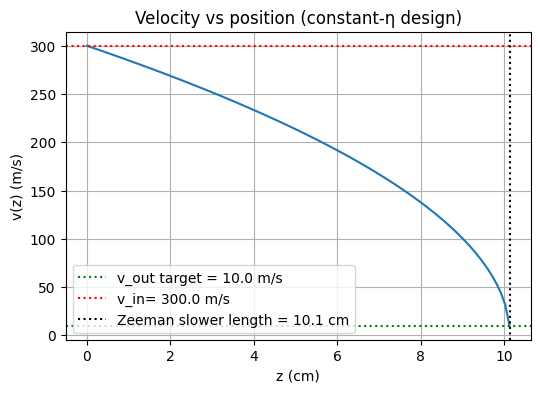

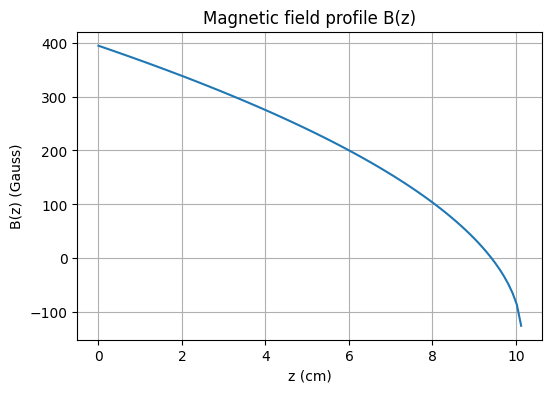

In [179]:
# plots
plt.figure(figsize=(6,4))
plt.plot(z*100, v)
plt.xlabel("z (cm)")
plt.ylabel("v(z) (m/s)")
plt.axhline(v_end, linestyle=":", color='green', label=f"v_out target = {v_end:.1f} m/s")
plt.axhline(u0, linestyle=":", color='red', label=f"v_in= {u0:.1f} m/s")
plt.axvline(L*100, linestyle=":", color='black', label=f"Zeeman slower length = {L*100:.1f} cm")
plt.title("Velocity vs position (constant-η design)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(z*100, Bz*1e4)
plt.xlabel("z (cm)")
plt.ylabel("B(z) (Gauss)")
plt.title("Magnetic field profile B(z)")
plt.grid(True)
plt.show()